##Text to image generation using stable diffusion and diffusers

In [1]:
#diffuser is a hugging face page for using diffusion models from hugging face hub

!pip install diffusers transformers accelerate

In [2]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt



The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
!pip show torch

Name: torch
Version: 2.5.0+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision


In [5]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"


In [6]:
pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_auth_token=True)
pipe=pipe.to("cuda")

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [7]:
prompt = "A futuristic city floating above the clouds at sunset, with tall, sleek skyscrapers made of glass and metal that shimmer in shades of gold and pink. Flying vehicles glide smoothly between buildings, and holographic billboards display vibrant, animated advertisements. In the foreground, a woman in a flowing silver dress stands on a transparent balcony, looking out at the cityscape with a serene expression. The sky above is filled with shades of orange, pink, and purple as the sun sets, and a few stars begin to twinkle against the backdrop of distant mountains peeking above the cloud layer."

In [8]:
image = pipe(prompt).images[0]

Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['. the sky above is filled with shades of orange, pink, and purple as the sun sets, and a few stars begin to twinkle against the backdrop of distant mountains peeking above the cloud layer.']


  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  A futuristic city floating above the clouds at sunset, with tall, sleek skyscrapers made of glass and metal that shimmer in shades of gold and pink. Flying vehicles glide smoothly between buildings, and holographic billboards display vibrant, animated advertisements. In the foreground, a woman in a flowing silver dress stands on a transparent balcony, looking out at the cityscape with a serene expression. The sky above is filled with shades of orange, pink, and purple as the sun sets, and a few stars begin to twinkle against the backdrop of distant mountains peeking above the cloud layer.


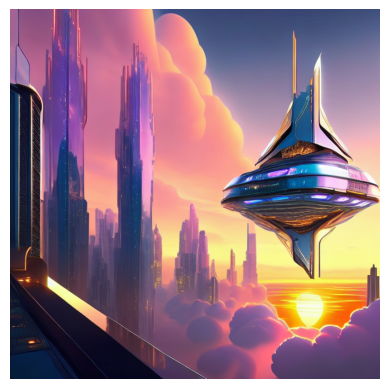

In [9]:
print("[PROMPT]: ", prompt)
plt.imshow(image)
plt.axis("off")
plt.show()

In [17]:
prompt1 ="Dog writing exam"
prompt1

'Dog writing exam'

In [18]:
image1 = pipe(prompt1).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [13]:
image1 = pipe(prompt1).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  Dog writing exam


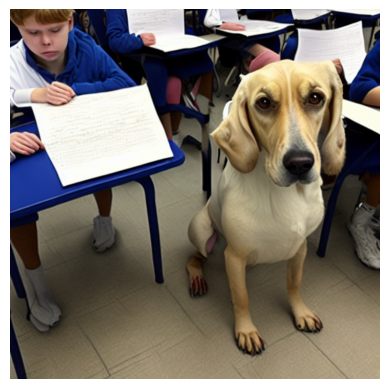

In [19]:
print("[PROMPT]: ", prompt1)
plt.imshow(image1)
plt.axis("off")
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT2]:  image of a young girl sitting calmly on a chair with a majestic tiger by her side. The scene captures a harmonious and serene connection between them


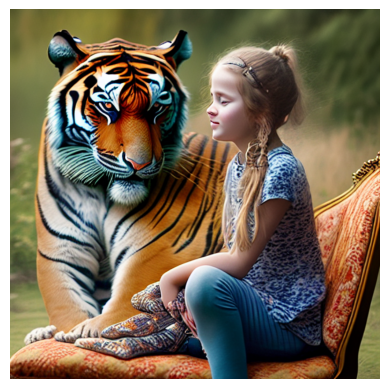

In [21]:
prompt2 ="image of a young girl sitting calmly on a chair with a majestic tiger by her side. The scene captures a harmonious and serene connection between them"
prompt2

image2 = pipe(prompt2).images[0]

print("[PROMPT2]: ", prompt2)
plt.imshow(image2)
plt.axis("off")
plt.show()

##working with stable diffusion parametors

Negative promting

num_infernece_steps

height

weight

num_imagers_per_prompt

In [22]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(1, num_images, figsize=(20,20))
    for i in range(num_images):
      ax[i].imshow(img[i])
      ax[i].axis("off");

      plt.show()
  else:
    plt.imshow(img[0])
    plt.axis("off")
    plt.show()


In [31]:
prompt = "A portrait of a beautiful devtional indian young girl with long, flowing hair and a serene expression. She is dressed in a flowing, soft fabric gown with delicate details, standing in a softly lit environment that highlights her natural features. Her skin glows in the gentle sunlight, and her eyes are calm and captivating. The background is a blend of soft pastel colors, with a hint of nature, such as subtle flowers or leaves, creating an ethereal and peaceful atmosphere. The lighting is warm, enhancing her natural beauty and giving the entire scene a timeless, classic feel."

parms ={}

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['of nature, such as subtle flowers or leaves, creating an ethereal and peaceful atmosphere. the lighting is warm, enhancing her natural beauty and giving the entire scene a timeless, classic feel.']


  0%|          | 0/50 [00:00<?, ?it/s]

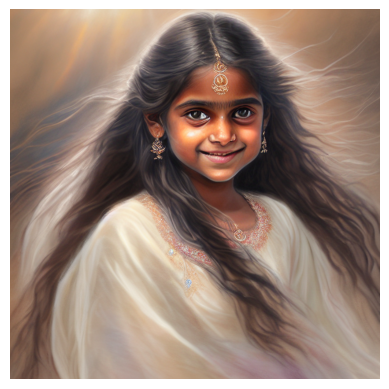

In [32]:
generate_image(pipe, prompt, parms)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['of nature, such as subtle flowers or leaves, creating an ethereal and peaceful atmosphere. the lighting is warm, enhancing her natural beauty and giving the entire scene a timeless, classic feel.']


  0%|          | 0/100 [00:00<?, ?it/s]

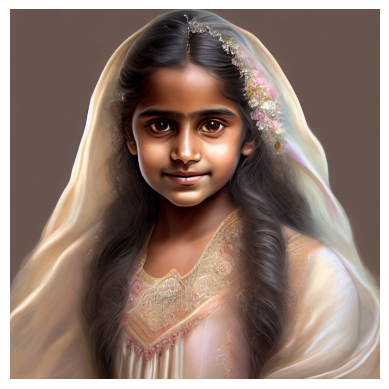

In [33]:
params = {'num_inference_steps': 100}
generate_image(pipe, prompt, params)

In [44]:
prompt1 = "A close-up portrait of a beautiful baby girl with big, sparkling eyes and soft, rosy cheeks. She has a gentle smile that radiates innocence and joy. She’s wearing a cozy pastel-colored outfit, perhaps a tiny headband with a small bow or flower, adding to her charm. The background is softly blurred with warm, natural lighting, creating a cozy and peaceful setting. Her expression is curious and playful, capturing the pure joy and innocence of early childhood."
parms ={}

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', and a small bindi graces her forehead. the background is softly lit, hinting at a serene village or temple scene with faint traditional patterns or lush greenery, creating a timeless and culturally rich atmosphere that celebrates her beauty and heritage.']


  0%|          | 0/100 [00:00<?, ?it/s]

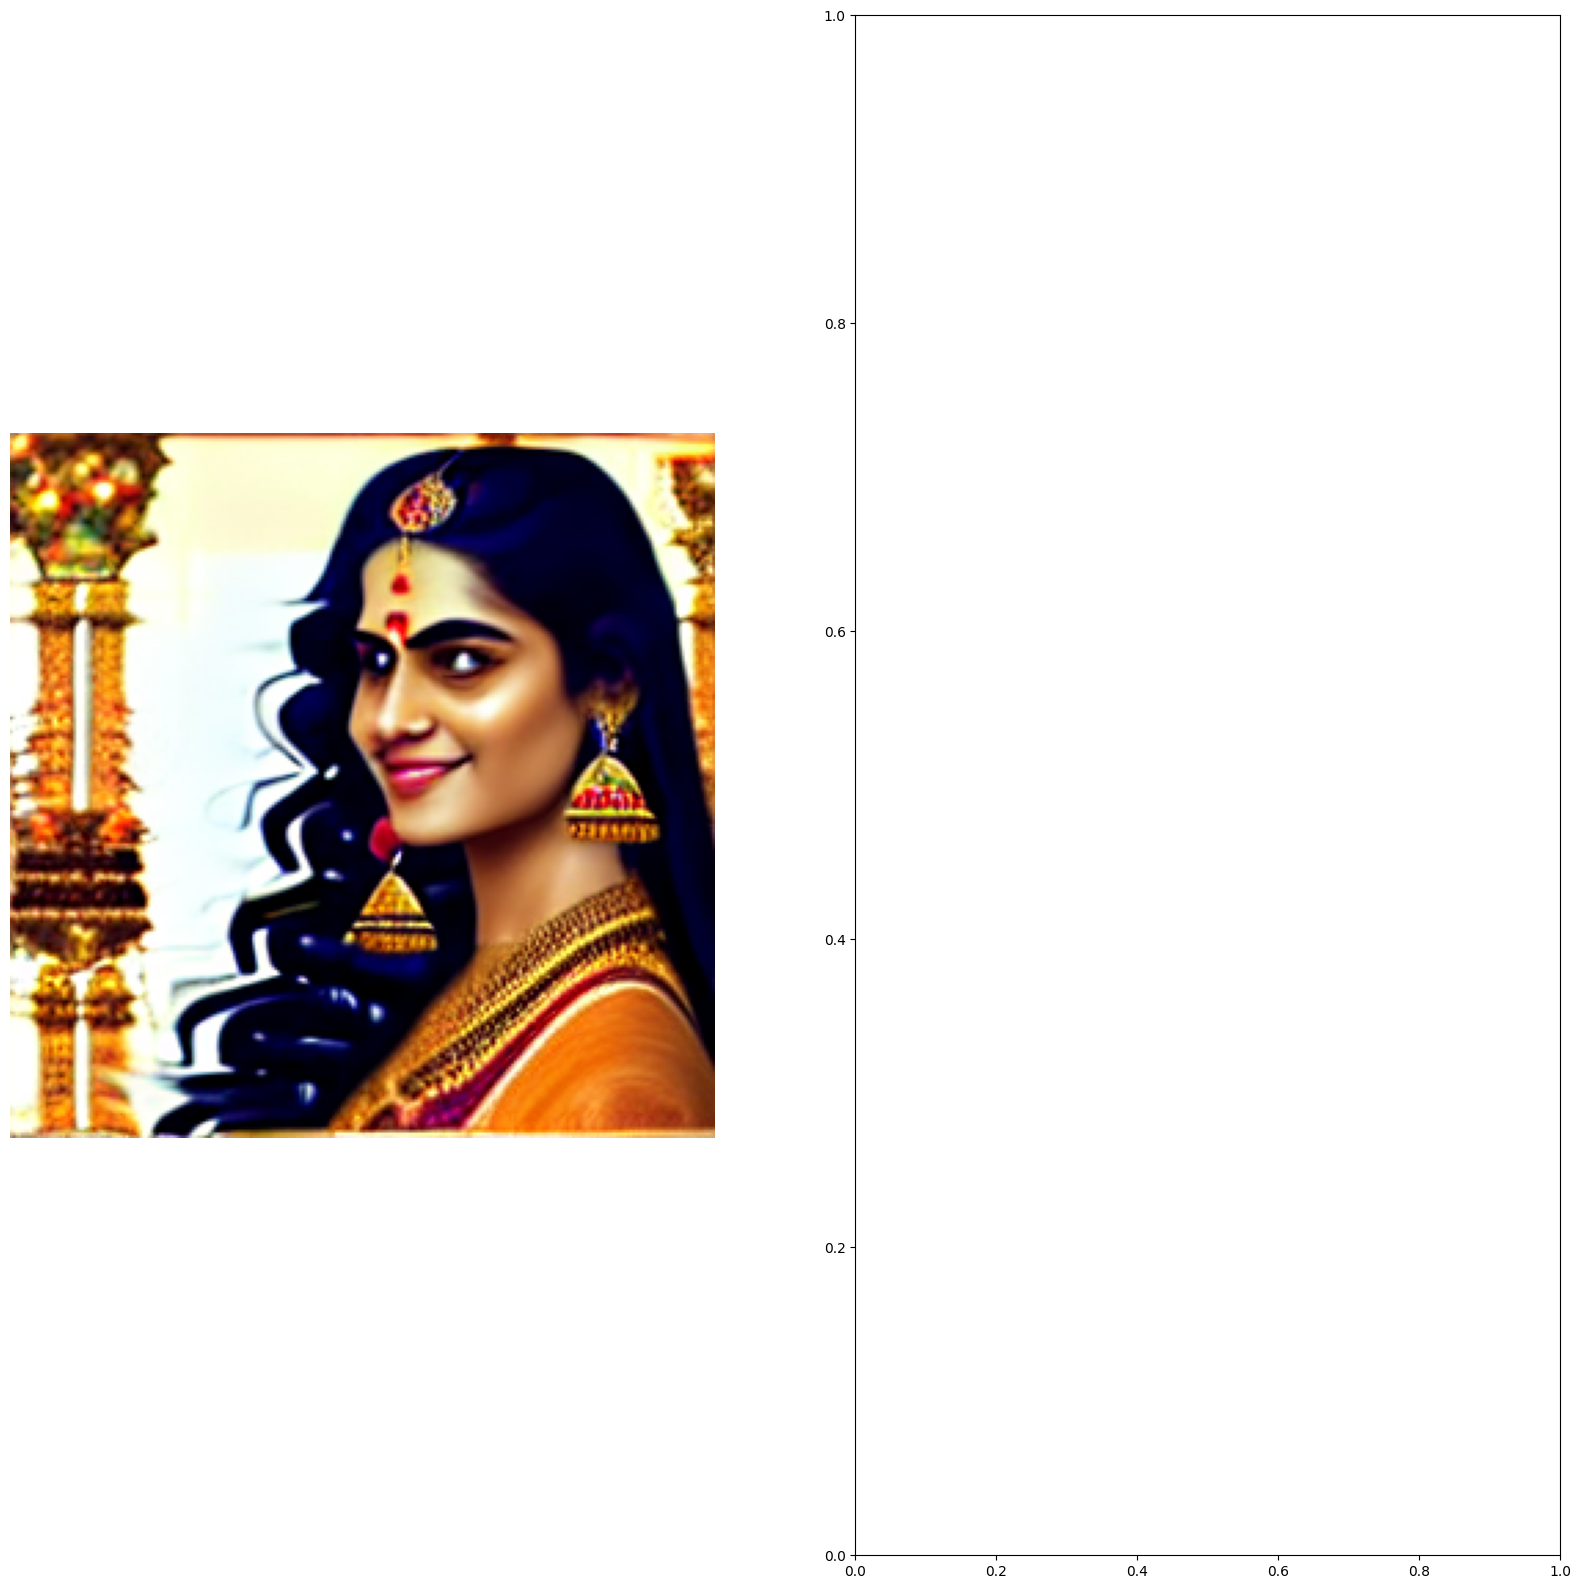

In [41]:
#height width

parms = {'height': 256, 'width': 256, 'num_inference_steps': 100, 'num_images_per_prompt': 2}
generate_image(pipe, prompt1, parms)


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', and a small bindi graces her forehead. the background is softly lit, hinting at a serene village or temple scene with faint traditional patterns or lush greenery, creating a timeless and culturally rich atmosphere that celebrates her beauty and heritage.']


  0%|          | 0/100 [00:00<?, ?it/s]

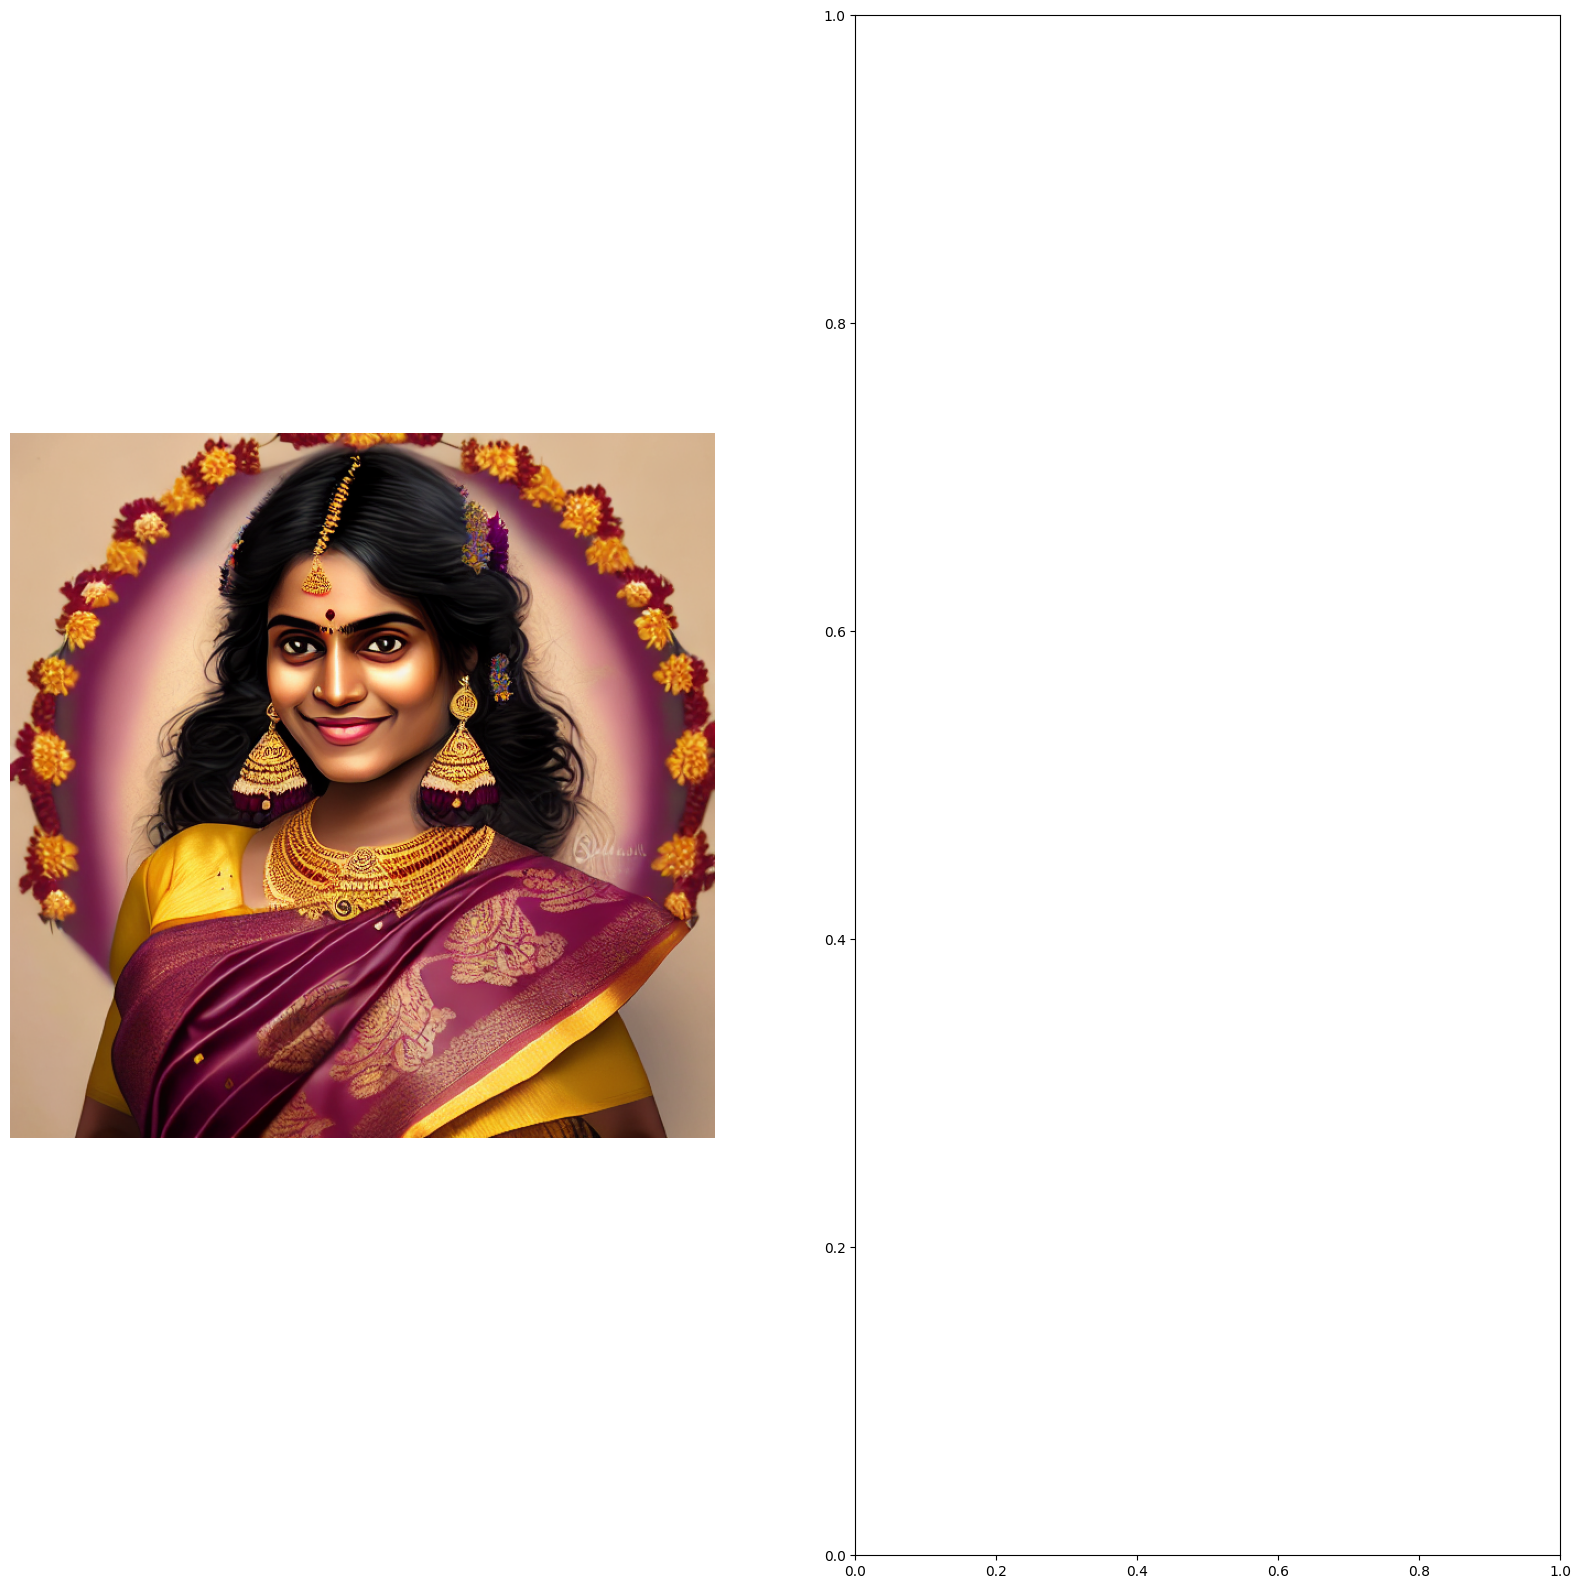

In [37]:
#num images per prompt

parms = {'num_inference_steps': 100, 'num_images_per_prompt': 2}
generate_image(pipe, prompt1, parms)

In [ ]:
#negative prompt

parms = {'num'}

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['and peaceful setting. her expression is curious and playful, capturing the pure joy and innocence of early childhood.']


  0%|          | 0/100 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['and peaceful setting. her expression is curious and playful, capturing the pure joy and innocence of early childhood.']


  0%|          | 0/100 [00:00<?, ?it/s]

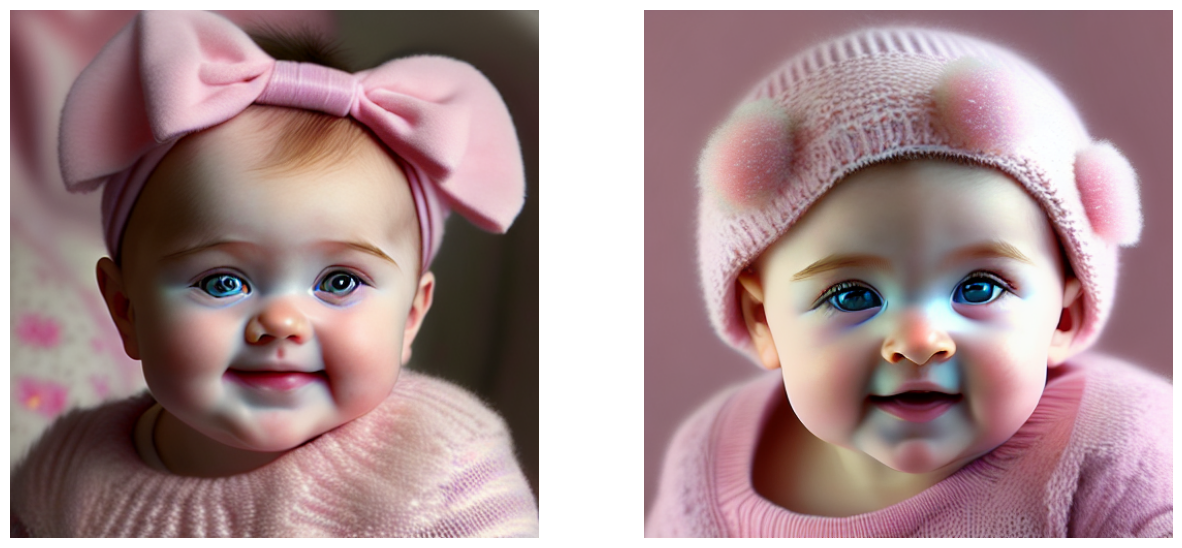

In [46]:
import matplotlib.pyplot as plt

def generate_multiple_images(pipe, prompt, params, num_images):
    # Generate multiple images individually if pipe does not support `num_images_per_prompt`
    images = [pipe(prompt, **params).images[0] for _ in range(num_images)]

    # Display the images in a grid
    fig, ax = plt.subplots(1, num_images, figsize=(15, 15))
    for i in range(num_images):
        ax[i].imshow(images[i])
        ax[i].axis("off")
    plt.show()

# Define parameters with reduced height and width
parms = {'height': 512, 'width': 512, 'num_inference_steps': 100}

# Generate and display 2 images
generate_multiple_images(pipe, prompt1, parms, num_images=2)


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['and peaceful setting. her expression is curious and playful, capturing the pure joy and innocence of early childhood.']


  0%|          | 0/100 [00:00<?, ?it/s]

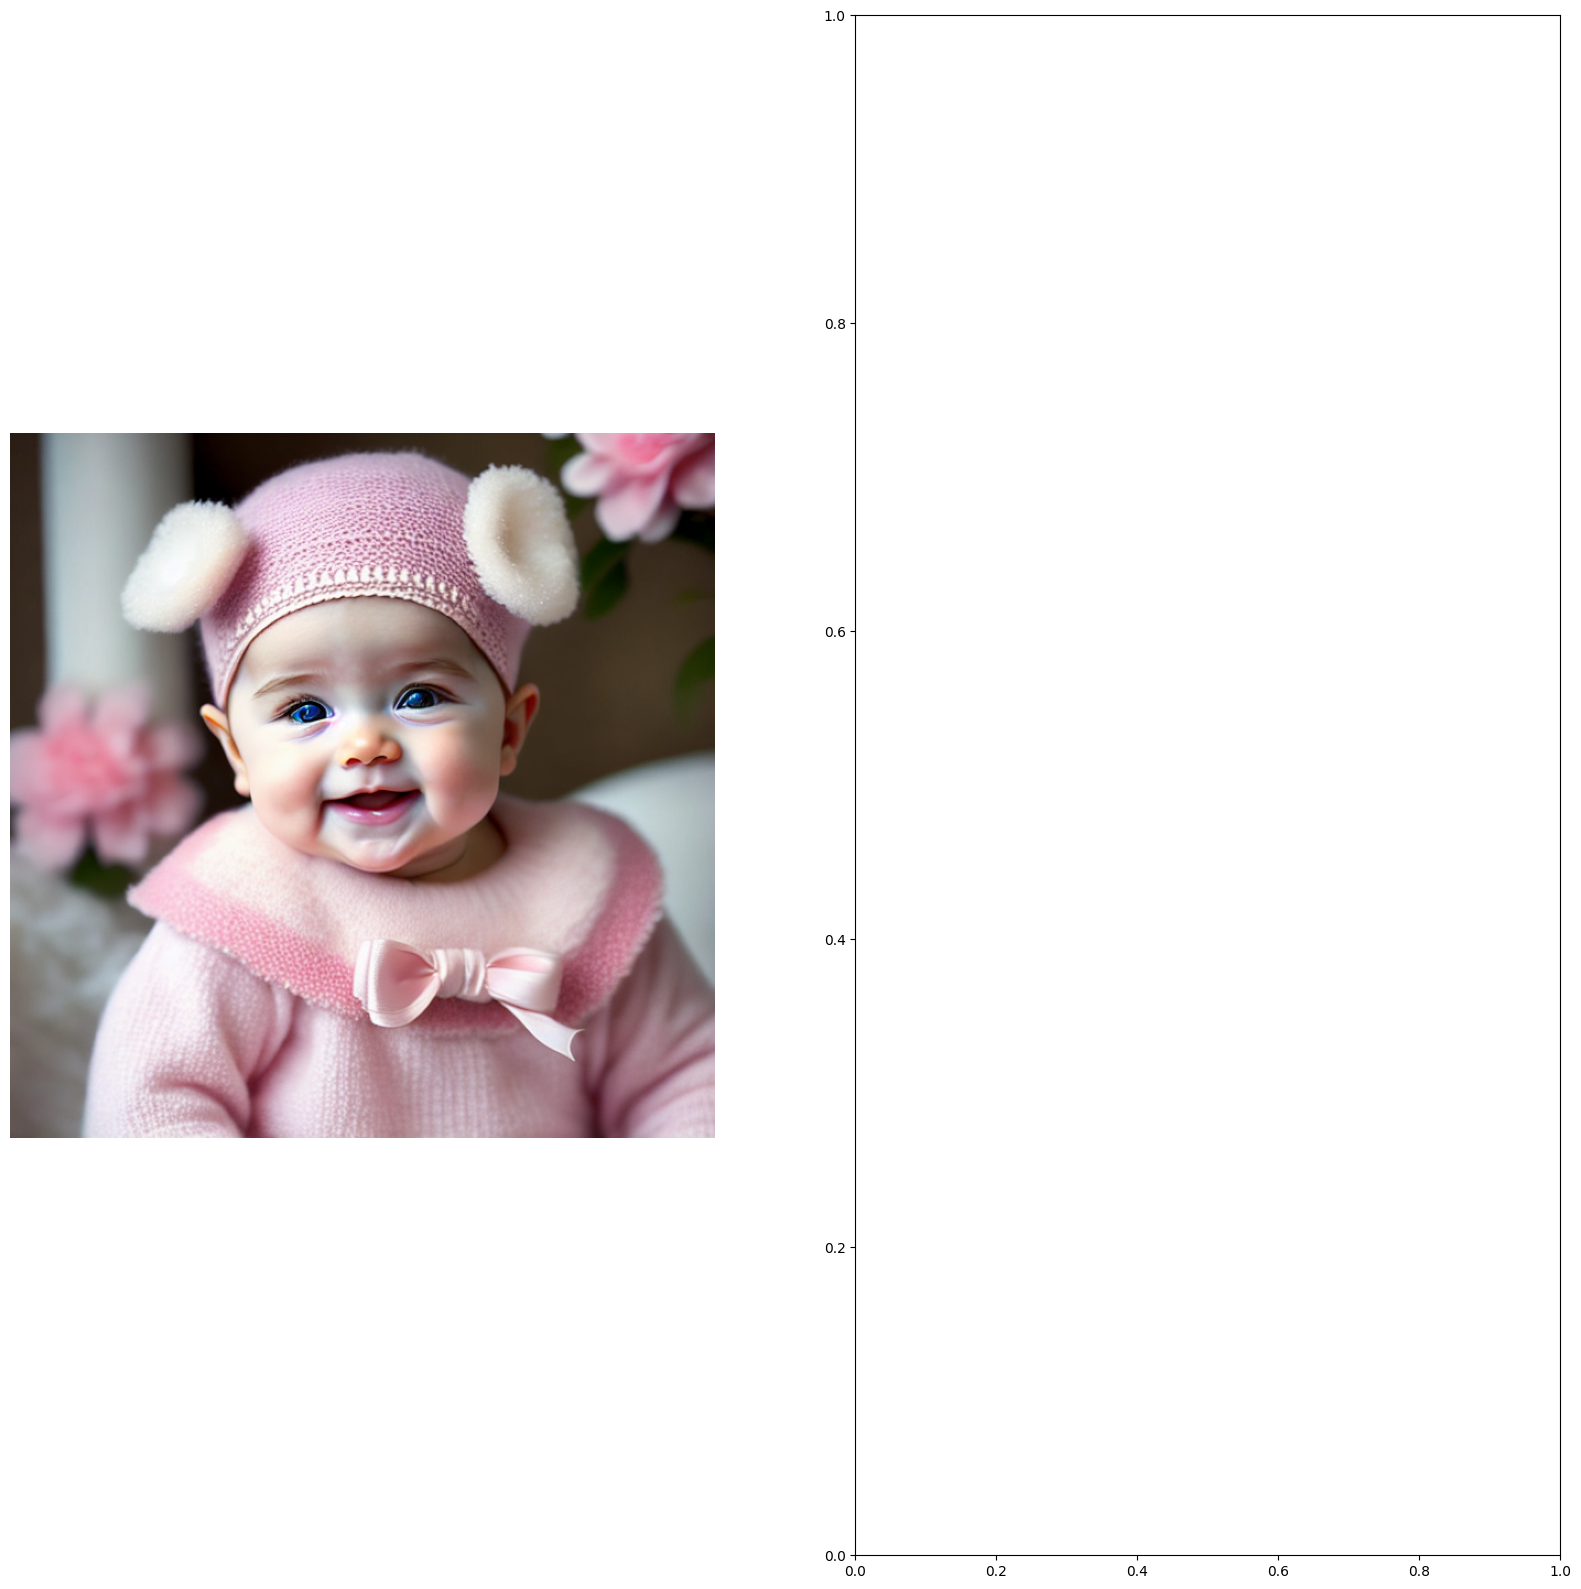

In [48]:
parms = {'num_inference_steps': 100, 'num_images_per_prompt': 2, 'negative_prompt': 'ugly, distorted, low quality'}
generate_image(pipe, prompt1, parms)


In [1]:
#negative_prompt

parms = {'num_inference_steps': 100, 'num_images_per_prompt': 2, 'negative_prompt': 'ugly, distorted, low quality'}
generate_image(pipe, prompt1, parms)

NameError: name 'generate_image' is not defined